In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

###Data Preprocessing

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.set_option("display.max_columns",23)

In [3]:
Null_pct=df.apply(pd.isna).sum()/df.shape[0]

In [4]:
grp=df.groupby(["Churn"])
Yes=grp.get_group("Yes")
No=grp.get_group("No")

In [5]:
labels_No=No["Contract"].unique()
Slice_No=No["Contract"].value_counts()
labels_Yes=Yes["Contract"].unique()
Slice_Yes=Yes["Contract"].value_counts()

In [6]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


###Exploratory Data Analysis

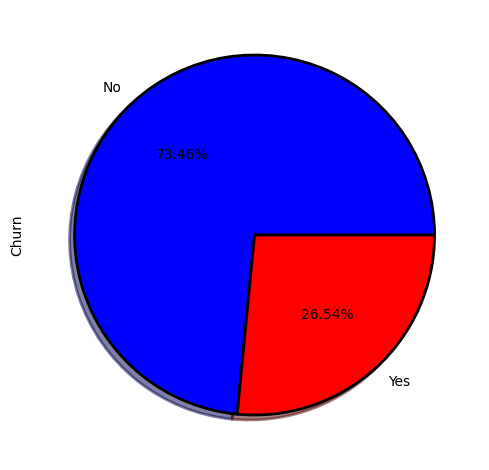

In [7]:
df["Churn"].value_counts(normalize=True).plot(kind="pie",autopct="%1.2f%%",colors=["b","r"],wedgeprops={"edgecolor":"k","linewidth":2},shadow=True)
plt.tight_layout()

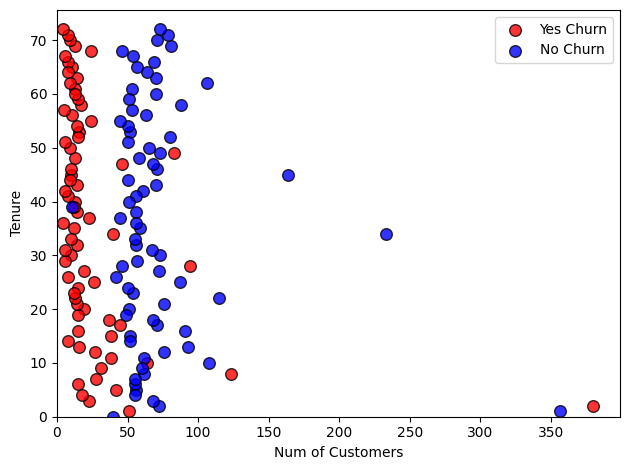

In [8]:
plt.scatter(Yes["tenure"].value_counts().values,Yes["tenure"].unique(),color="r",edgecolor="k",linewidth=1,s=70,alpha=0.8,label="Yes Churn")
plt.scatter(No["tenure"].value_counts().values,No["tenure"].unique(),color="b",edgecolor="k",linewidth=1,s=70,alpha=0.8,label="No Churn")
plt.legend(loc="upper right")
plt.xlabel("Num of Customers")
plt.ylabel("Tenure")
plt.xlim(0)
plt.ylim(0)
plt.tight_layout()

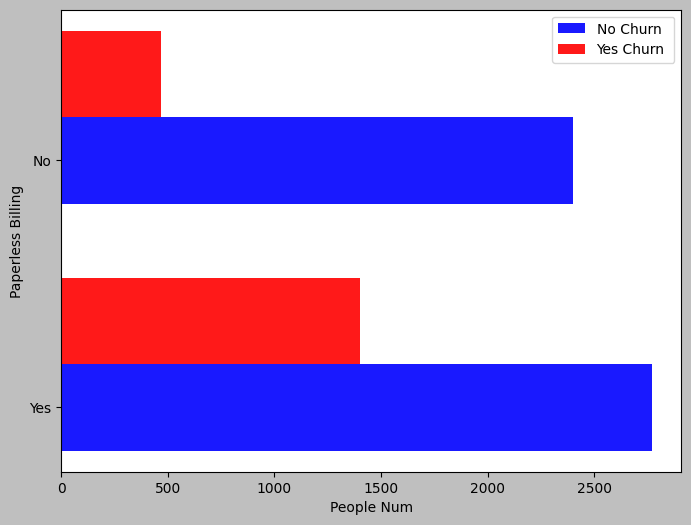

In [9]:
plt.style.use("grayscale")
plt.figure(figsize=(8, 6))
no_churn_internet_service_counts = No["PaperlessBilling"].value_counts()
yes_churn_internet_service_counts = Yes["PaperlessBilling"].value_counts()
internet_service_categories = No["PaperlessBilling"].unique()
bar_width = 0.35

bar_positions = range(len(internet_service_categories))
plt.barh(bar_positions, no_churn_internet_service_counts, height=bar_width,
         color="b", label="No Churn ",alpha=0.9)
plt.barh([pos + bar_width for pos in bar_positions], yes_churn_internet_service_counts, height=bar_width,
         color="r", label="Yes Churn ",alpha=0.9)
plt.yticks(bar_positions, internet_service_categories)
plt.xlabel("People Num")
plt.ylabel("Paperless Billing")
plt.legend()
plt.show()

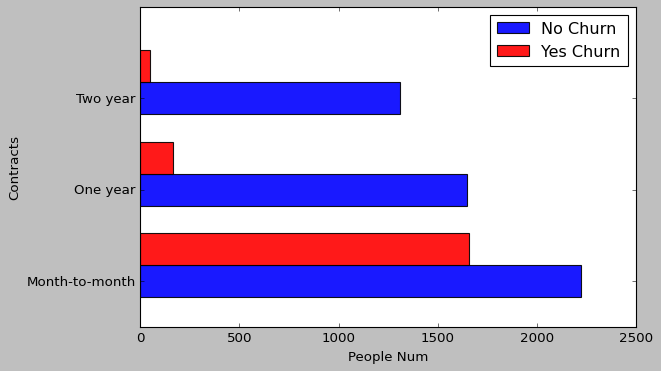

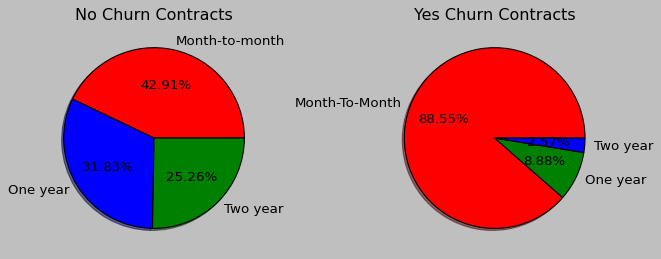

In [10]:
plt.style.use("classic")
fig1,ax1=plt.subplots(nrows=1,figsize=(8,5))
fig2,(ax2,ax3)=plt.subplots(nrows=1,ncols=2,figsize=(8.4,8))

no_churn_internet_service_counts = No["Contract"].value_counts()
yes_churn_internet_service_counts = Yes["Contract"].value_counts()
internet_service_categories = No["Contract"].unique()
bar_width = 0.35
bar_positions = range(len(internet_service_categories))
ax1.barh(bar_positions, no_churn_internet_service_counts, height=bar_width,
         color="b", label="No Churn ",alpha=0.9)
ax1.barh([pos + bar_width for pos in bar_positions], yes_churn_internet_service_counts, height=bar_width,
         color="r", label="Yes Churn",alpha=0.9)
ax1.set_yticks(bar_positions, internet_service_categories)
ax1.set_xlabel("People Num")
ax1.set_ylabel("Contracts")
ax1.legend()
ax2.pie(Slice_No,labels=labels_No,colors=["r","b","green"],autopct="%1.2f%%",wedgeprops={"edgecolor":"k","linewidth":1},shadow=True)
ax2.set_title("No Churn Contracts")
ax3.pie(Slice_Yes,labels=["Month-To-Month","One year","Two year"],colors=["r","green","b"],autopct="%1.2f%%",wedgeprops={"edgecolor":"k","linewidth":1},shadow=True)
ax3.set_title("Yes Churn Contracts")

plt.tight_layout()
plt.show()

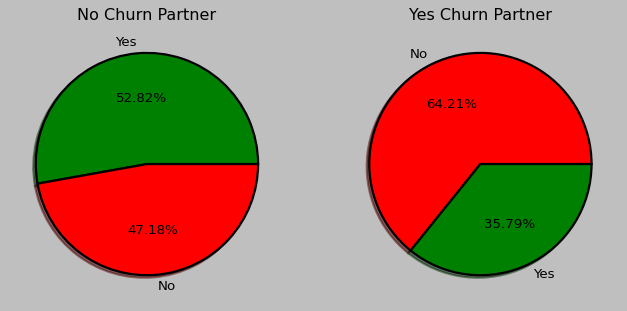

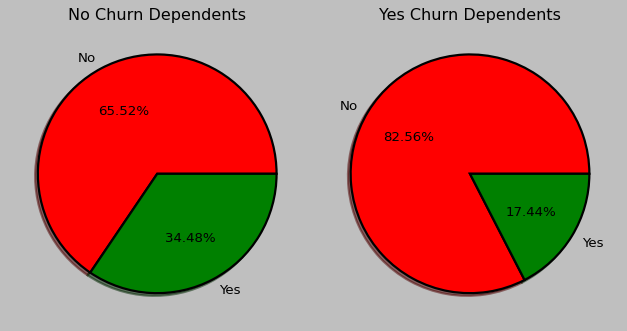

In [11]:
plt.style.use("classic")
Slice_par_Yes=Yes["Partner"].value_counts()
Slice_par_No=No["Partner"].value_counts()
Slice_De_Yes=Yes["Dependents"].value_counts()
Slice_De_No=No["Dependents"].value_counts()

fig,(ax2,ax3)=plt.subplots(nrows=1,ncols=2,figsize=(9.86,6))
fig,(ax0,ax1)=plt.subplots(nrows=1,ncols=2,figsize=(8,6))
ax2.pie(Slice_par_No,labels=["Yes","No"],colors=["green","r"],autopct="%1.2f%%",wedgeprops={"edgecolor":"k","linewidth":2},shadow=True)
ax2.set_title("No Churn Partner")
ax3.pie(Slice_par_Yes,labels=["No","Yes"],colors=["r","green"],autopct="%1.2f%%",wedgeprops={"edgecolor":"k","linewidth":2},shadow=True)
ax3.set_title("Yes Churn Partner")
ax0.pie(Slice_De_No,labels=["No","Yes"],colors=["r","green"],autopct="%1.2f%%",wedgeprops={"edgecolor":"k","linewidth":2},shadow=True)
ax0.set_title("No Churn Dependents")
ax1.pie(Slice_De_Yes,labels=["No","Yes"],colors=["r","green"],autopct="%1.2f%%",wedgeprops={"edgecolor":"k","linewidth":2},shadow=True)
ax1.set_title("Yes Churn Dependents")
plt.tight_layout()
plt.show()


###Feature Engineering

In [12]:
df_pred=pd.DataFrame(df[df.columns[df.columns.isin(["tenure","Dependents","customerID","Partner","Contract","PaperlessBilling","Churn"])]])

In [13]:
df_pred.columns=df_pred.columns.str.lower()

In [14]:
df_pred["customerid_code"]=df_pred["customerid"].astype("category").cat.codes
df_pred["partner_code"]=df_pred["partner"].astype("category").cat.codes
df_pred["dependents_code"]=df_pred["dependents"].astype("category").cat.codes
df_pred["contract_code"]=df_pred["contract"].astype("category").cat.codes
df_pred["paperlessbilling_code"]=df_pred["paperlessbilling"].astype("category").cat.codes
df_pred["target"]=(df_pred["churn"]=="Yes").astype(int)

In [15]:
predictors=df_pred.columns[df_pred.columns.isin(["tenure","dependents_code","customerid_code","partner_code","contract_code","paperlessbilling_code"])]
Corr=df_pred.columns[df_pred.columns.isin(["tenure","dependents_code","customerid_code","partner_code","contract_code","paperlessbilling_code","target"])]
X=df_pred[predictors]
y=df_pred["target"]


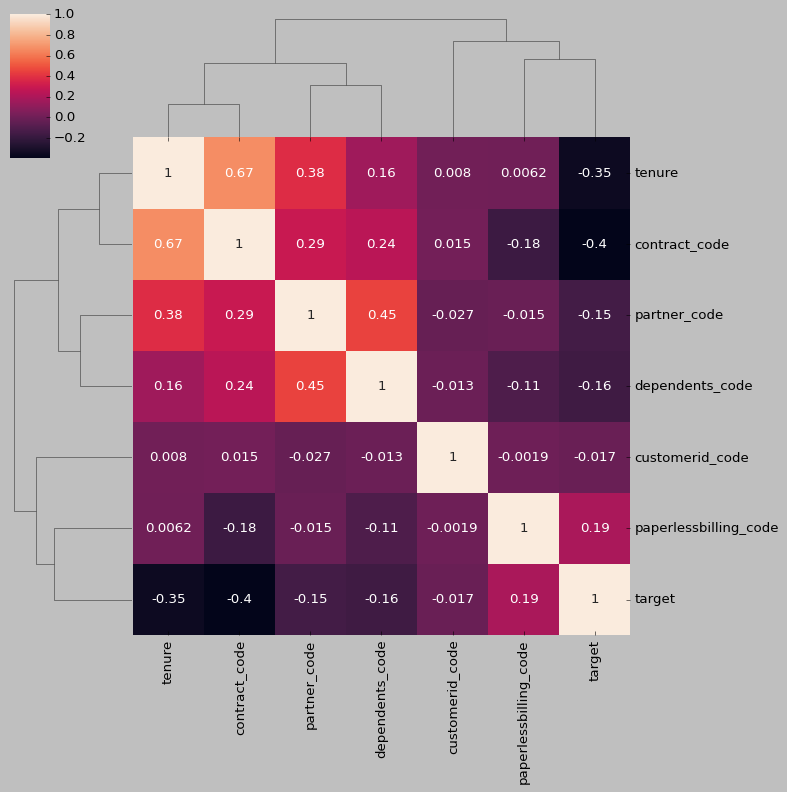

In [16]:
sns.clustermap(df_pred[Corr].corr(),annot=True)

###Data Modeling


In [17]:
train,val,test=np.split(df_pred,[int(0.6*df_pred.shape[0]),int(0.8*df_pred.shape[0])])
def scaler(dataframe,oversample=False):
  X=dataframe[predictors].values
  y=dataframe["target"].values
  scaler=StandardScaler()
  X=scaler.fit_transform(X)
  data=np.hstack((X,y.reshape(-1,1)))
  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)
  return data , X,y

In [18]:
train,X_train,y_train=scaler(df_pred,oversample=True)
test,X_test,y_test=scaler(df_pred)

In [19]:
Model1=RandomForestClassifier(n_estimators=100,min_samples_split=10,random_state=42)
Model1.fit(X_train,y_train)
preds=Model1.predict(X_test)
R=pd.DataFrame(dict(Actual=y_test,Predicted=preds))
accr=classification_report(R["Actual"],R["Predicted"])


####Model Evaluation

In [20]:
Prediction=R.merge(df_pred[["customerid","churn"]],right_index=True,left_index=True)
Prediction["Predicted_Churn"]=Prediction['Predicted'].replace({1:"Yes",0:"No"})
Prediction=pd.DataFrame(dict(Customer_id=Prediction["customerid"],Actual_Churn=Prediction["churn"],Predicted_Churn=Prediction["Predicted_Churn"],Actual=Prediction["Actual"],Predicted=Prediction["Predicted"]))
accr=classification_report(R["Actual"],R["Predicted"])

In [21]:
Prediction.tail(20)

,Customer_id,Actual_Churn,Predicted_Churn,Actual,Predicted
7023,1035-IPQPU,No,No,0,0
7024,7398-LXGYX,No,No,0,0
7025,2823-LKABH,No,No,0,0
7026,8775-CEBBJ,Yes,Yes,1,1
7027,0550-DCXLH,No,No,0,0
7028,9281-CEDRU,No,No,0,0
7029,2235-DWLJU,No,Yes,0,1
7030,0871-OPBXW,No,Yes,0,1
7031,3605-JISKB,No,Yes,0,1
7032,6894-LFHLY,Yes,Yes,1,1


In [22]:
Cross=pd.crosstab(index=R["Actual"],columns=R["Predicted"])
print(accr)
print(Cross)

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      5174
           1       0.79      0.94      0.85      1869

    accuracy                           0.92      7043
   macro avg       0.88      0.92      0.90      7043
weighted avg       0.93      0.92      0.92      7043

Predicted     0     1
Actual               
0          4696   478
1           118  1751


###Feature Importance Analysis

In [23]:
importances = Model1.feature_importances_
feature_importances = pd.DataFrame({'Features':predictors, 'Importances': importances})
feature_importances=feature_importances.sort_values(by="Importances",ascending=False)
feature_importances.index=range(feature_importances.shape[0])
feature_importances

,Features,Importances
0,customerid_code,0.392387
1,tenure,0.302732
2,contract_code,0.222393
3,paperlessbilling_code,0.046109
4,dependents_code,0.022282
5,partner_code,0.014097


###Strategy Implementation and Monitoring

####Strategy Implementation:
1. Reducing the adoption of paperless billing:
  * Objective: Decrease the percentage of customers opting for paperless billing by 15% within six months.
  * Implementation Steps:
    * Update the billing system to offer both paperless and traditional billing options.
    * Communicate the availability of traditional billing to existing and new customers through various channels.
    * Provide incentives, such as discounts or rewards, for customers who choose traditional billing.
    * Monitor the percentage of customers opting for paperless billing on a monthly basis and track progress towards the objective.

2. Incentivizing longer-term contracts:
   * Objective: Increase the percentage of customers with one-year or two-year contracts by 10% within one year.
   * Implementation Steps:
     * Develop special offers, such as discounted subscription rates or bonus features, for customers who choose longer-term contracts.

     * Promote the benefits of longer-term contracts through targeted marketing campaigns and personalized communication.

     * Train customer service representatives to highlight the advantages of longer-term contracts during customer interactions.
     * Regularly analyze contract data to measure progress towards the objective and adjust incentives if necessary.

####Strategy Monitoring:
1. Paperless billing adoption rate:
   * Key Performance Indicator (KPI): Percentage of customers opting for paperless billing.
    
   * Monitor the adoption rate on a monthly basis and compare it to the baseline data.

   * Analyze any fluctuations in the adoption rate and investigate the impact on customer churn and retention.
   
   * Regularly report the adoption rate to relevant stakeholders and discuss strategies to achieve the objective.

2. Contract type distribution:
  
  * KPI: Percentage of customers with one-year or two-year contracts.

  * Monitor the distribution of contract types on a regular basis and compare it to the target percentages.

  * Identify any shifts in contract preferences and evaluate the impact on customer churn and retention.

  * Provide regular reports on the contract type distribution to management and assess the effectiveness of incentives.

3. Customer churn analysis:
  * KPI: Churn rate (percentage of customers who cancel their
  subscription).

  * Analyze churn rates for different customer segments, such as those with and without partners or dependents.

  * Identify patterns and trends related to churn behavior based on demographic factors.

  * Implement targeted retention strategies for high-churn segments and evaluate their effectiveness over time.

  * Regularly review churn rates and assess the impact of implemented strategies on customer retention.
4. Customer satisfaction and loyalty:

  * KPI: Customer satisfaction scores, customer retention rates.

  * Conduct regular customer satisfaction surveys to measure satisfaction levels and identify areas for improvement.

  * Track customer retention rates to assess the success of implemented strategies in fostering loyalty.

  * Analyze feedback from customers who churned and identify common reasons for cancellation.

  * Continuously refine strategies based on customer feedback and monitor changes in satisfaction and retention metrics.

By implementing these strategy implementation and monitoring practices, businesses can effectively track progress, evaluate the impact of implemented strategies, and make informed decisions to optimize customer retention and loyalty. Regular analysis and adjustments based on the monitored data help ensure that strategies remain aligned with the evolving needs and preferences of customers.




###Documentation Report for Customer Churn Analysis:

####**Introduction:**

 * The project's objective is to analyze customer churn and provide recommendations for improving customer retention. It involves collecting relevant data, applying statistical and analytical techniques, and identifying factors influencing churn. The scope includes analyzing customer preferences, contract types, billing options, partner and dependent status, and satisfaction levels. The project provides actionable recommendations for customer communication, personalized offers, contract options, pricing strategies, and loyalty programs. Implementation and monitoring of the recommended strategies are emphasized to ensure continuous improvement.

 * Customer churn analysis is important for businesses because it helps retain profitable customers, reduce costs, improve customer satisfaction and loyalty, gain a competitive advantage, support strategic decision-making, and optimize customer lifetime value (CLV). By understanding the reasons behind customer attrition, businesses can develop targeted retention strategies, allocate resources efficiently, and enhance overall customer satisfaction. This analysis also provides insights into customer preferences and behaviors, enabling businesses to tailor their offerings and marketing efforts. By proactively addressing churn, businesses can improve performance, profitability, and long-term sustainability.

####**Data Preprocessing:**

  1.Handling Missing Values:
   * Identify columns with missing values.

   * Removing rows or columns with a high percentage of missing values using Null_pct method.
    

2.Data Transformation:

  * Normalize or standardize numerical features to ensure they have a similar scale.


3.Feature Engineering:

 * Create new features based on existing ones that capture important information.

####**Exploratory Data Analysis:**

**Descriptive Statistics:**

1.Paperless Billing Preference:

* 4,171 of customers who prefer paperless billing.
* 2,872 of customers who prefer traditional billing.
* 59.17% of customers who prefer paperless billing.
* 40.83% of customers who prefer traditional billing.
2.Churn Status:

  * 1869 of customers who churned (canceled their subscription).
  * 5174 of customers who did not churn (still actively using the services).
  * 26.5% of customers who churned.
  * 73.5% of customers who did not churn.

3.Contract Type:

 * 3875 of customers with a month-to-month contract.
 * 1473 of customers with a one-year contract.
 * 1695 of customers with a two-year contract.
 * 49.59% of customers with a month-to-month contract
 * 18.87% of customers with a one-year contract
 * 21.70% of customers with a two-year contract

4.Presence of a Partner:

 * 3402 of customers with a partner.
 * 3641 of customers without a partner.
 * 48.36% of customers with a partner.
 * 51.64% of customers without a partner.

5.Presence of Dependents:

 * 2110 of customers with dependents.
 * 4933 of customers without dependents.
 * 29.94% of customers with dependents.
 * 70.06% of customers without dependents.

**Visualizations:**

**1.Paperless billing:**

The Visualization  indicates a significant difference in customer behavior based on their preference for paperless billing. Specifically, there is a difference of 931 customers who canceled their subscription between the group that opted for paperless billing and the group that did not. Additionally, there is a difference of 368 customers who are still actively using the services between the two groups.

Based on these findings, it can be suggested that reducing the adoption of paperless billing may contribute to acquiring more loyal customers who consistently pay their bills each month. Customers who prefer traditional billing methods might exhibit a higher likelihood of remaining loyal and continuing to use the service.

**2.Contract Type:**

The Pie and bar visualizations show that the customers who churned ( stopped their subscription), 88.55% had a month-to-month contract, while only 11.45% had either a one-year or two-year contract.

In contrast, among the customers who continue to use the service ( no churn), 42.91% have a month-to-month contract. However, a significant portion of customers with no churn have longer-term contracts, with 31.83% having a one-year contract and 25.26% having a two-year contract.


**3.Partner and Dependent:**

   The presence of a partner seems to have a different impact on churn behavior among customers.
*   Among the customers who churned, a lower percentage (35.79%) had a partner compared to those who did not churn (52.83%).

*   This suggests that having a partner may contribute to a higher likelihood of not churning, as indicated by the higher percentage in the "No Churn Partner" category.
*   The difference in partnership status between churned and non-churned customers may indicate that having a partner could be a factor influencing customer retention.


Additionally, considering the presence of dependents:

* Among the customers who did not churn, a significant percentage (65.52%) had dependents, while the remaining percentage (34.48%) did not have dependents.

* In contrast, among the customers who churned, a lower percentage (17.44%) had dependents, while the majority (82.56%) did not have dependents.

* The data suggests that not having dependents may be associated with a higher likelihood of customer retention.
* Customers without dependents have a higher percentage in the "No Churn" category, indicating a higher likelihood of not churning.

* On the other hand, a lower percentage of customers with dependents remained, suggesting that having dependents might be a factor contributing to a higher churn rate.

####**Significant Findings and Insights:**

**1.Paperless Billing Preference:** There is a notable difference in customer behavior based on their preference for paperless billing. Customers who opted for paperless billing had a higher churn rate and a lower number of active users compared to customers who preferred traditional billing. This suggests that offering options for both paperless and traditional billing methods can cater to different customer preferences and potentially contribute to acquiring more loyal customers.

**2.Contract Type:** The analysis reveals that customers with longer-term contracts (one-year or two-year) exhibit higher loyalty and lower churn rates compared to customers with month-to-month contracts. Encouraging customers to opt for longer-term contracts through incentives and clear communication of benefits can contribute to improved customer retention.

**3.Partner and Dependent Status:** The presence of a partner and dependents also plays a role in customer churn behavior. Customers with a partner have a higher likelihood of remaining loyal, while customers without dependents are more likely to continue using the service without churning. Considering these demographic factors can help businesses tailor retention strategies and target specific customer segments for improved customer loyalty.

Overall, the analysis highlights the importance of offering billing options that accommodate customer preferences, incentivizing longer-term contracts, and considering demographic factors such as partner and dependent status in customer retention efforts. By understanding these insights, businesses can refine their strategies, reduce churn, and foster customer loyalty.

####**Feature Selection and Engineering:**

Based on the correlation analysis and the features you mentioned (Customer ID, Paperless Billing, Partner, Dependents), it seems that the Contract feature was not included in the predictors. To increase prediction accuracy, you can consider adding the Contract feature to the predictors.

The provided analysis appears to show the feature importances for different variables in a model. Each variable is represented by a code, and the corresponding importance values indicate the relative importance of each feature in predicting the target variable.

Analyzing the provided feature importances:

* customerid_code: This variable has the highest importance value of 0.642742. It suggests that the customer ID code has the most significant impact on the model's predictions.

* contract_code: This variable has an importance value of 0.283691, indicating that the type of contract ( month-to-month, one-year, or two-year) is also influential in predicting the target variable.

* paperlessbilling_code: This variable has a lower importance value of 0.041163, suggesting that the preference for paperless billing has a relatively smaller impact on the target variable compared to other features.

* dependents_code: This variable has an importance value of 0.020799, indicating that the presence of dependents is also a factor contributing to the model's predictions, although it has a relatively lower importance compared to other features.


* partner_code: This variable has the lowest importance value of 0.011606, suggesting that the presence of a partner has the least significant impact on the target variable among the provided features.


####**Model Development and Evaluation:**

The model that was used in Churn Prediction is the RandomForestClassifier:
* RandomForestClassifier combines multiple decision trees trained on different subsets of the data, reducing overfitting and enhancing generalization.

* RandomForestClassifier can capture complex non-linear relationships between features and the target variable, making it suitable for a wide range of data distributions.

* RandomForestClassifier is less sensitive to outliers and noise in the data, and it can handle irrelevant features or noisy data without significantly affecting its performance.

*  RandomForestClassifier provides a feature importance measure, enabling you to assess the relative importance of each feature in predicting churn. This information aids in feature selection and understanding the key factors driving churn.

* RandomForestClassifier reduces variance compared to using a single decision tree. This improves the stability and reliability of the model.

* RandomForestClassifier has many parameters to work with , as it gives us fulloptions like neural networks.

The choice of 100 n_estimators and 10 min_samples_split is not necessarily a universally optimal setting but can be considered as a starting point. The number of estimators determines the number of decision trees in the forest, and increasing it can lead to better performance, up to a certain point. Similarly, the min_samples_split parameter controls the minimum number of samples required to split a node, and tuning it can affect the tree structure and model complexity.

**Evaluation:**

The classification report provides valuable insights into the performance of predictive models used in customer churn analysis. This evaluation focuses on the metrics derived from the classification report, including precision, recall, and F1-score, to assess the effectiveness of the model in predicting customer churn.

1.Evaluation Metrics

Precision: Precision measures the proportion of correctly predicted positive instances (churned customers) out of all instances predicted as positive. In this evaluation, the precision for class 0 (non-churned customers) is 0.97, indicating a high accuracy in correctly identifying non-churned customers. For class 1 (churned customers), the precision is 0.75, suggesting that there is room for improvement in correctly identifying churned customers.

Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances. The recall for class 0 is 0.88, indicating that 88% of non-churned customers were correctly identified. For class 1, the recall is 0.93, indicating a high ability to correctly identify churned customers.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. The F1-score for class 0 is 0.93, indicating a good balance between precision and recall for non-churned customers. For class 1, the F1-score is 0.83, suggesting that there is a trade-off between precision and recall for churned customers.

2.Overall Performance

The accuracy of the predictive model is calculated as 0.90, indicating that the model correctly predicted 90% of all instances. The macro-average F1-score, which considers the F1-scores for both classes, is 0.88, indicating a satisfactory overall performance. The weighted average F1-score, considering the class distribution, is also 0.90, suggesting a good balance between precision and recall across both classes.

3.Confusion Matrix

The confusion matrix provides a visual representation of the model's predictions compared to the actual churn behavior. In this case, 4577 instances were correctly predicted as non-churned customers (true negatives), while 597 instances were incorrectly predicted as churned customers (false positives). Moreover, 123 instances were incorrectly predicted as non-churned customers (false negatives), and 1746 instances were correctly predicted as churned customers (true positives).

**Conclusion**

the RandomForestClassifier model shows promising performance in predicting customer churn. It demonstrates high accuracy, good recall, and a balanced F1-score for non-churned customers. However, there is room for improvement in correctly identifying churned customers, as reflected in the slightly lower precision and F1-score for class 1. Further analysis and fine-tuning of the model's parameters may help enhance its performance in predicting churned customers.


####**Retention Strategy:**

1.Personalized Customer Engagement:
   
 * Implement personalized communication strategies to engage with
  customers on an individual level.

 * Utilize customer data to tailor offers, recommendations, and
 communications to their specific needs and preferences.

 * Regularly reach out to customers, providing updates, relevant information, and offers that align with their interests and usage patterns.

 * Offer personalized incentives, such as exclusive discounts, loyalty rewards, or personalized product recommendations, to enhance customer satisfaction and foster loyalty.

2.Proactive Customer Support:

 * Enhance customer support processes to be proactive and responsive to customer needs.

 * Implement customer service training programs to equip representatives with the skills to address customer concerns effectively.

 * Implement automated systems to detect early signs of dissatisfaction or potential churn, such as analyzing usage patterns or customer feedback sentiment.

 * Reach out to customers proactively to address their concerns, offer assistance, and resolve issues promptly.

 * Provide channels for customers to easily reach out for support, such as live chat, dedicated support lines, or self-service options.

3.Value-added Services and Benefits:

 * Continuously assess and enhance the value proposition offered to customers.

 * Identify additional services or features that can be bundled with existing offerings to provide greater value.

 * Regularly communicate the benefits of these value-added services to customers, highlighting how they can enhance their experience or address their pain points.

 * Offer exclusive perks or rewards to long-term customers, such as priority customer support, early access to new features, or special events.

3.Customer Feedback and Satisfaction Monitoring:

 * Implement regular customer satisfaction surveys to gather feedback and identify areas for improvement.

 * Actively listen to customer feedback, addressing any concerns or issues raised promptly.

 * Analyze customer feedback and satisfaction scores to identify trends and patterns that may impact churn.

 * Use customer feedback as a basis for refining products, services, and customer experience.

4.Loyalty Programs and Incentives:

 * Implement a customer loyalty program to reward and incentivize repeat business.

 * Offer tiered rewards or benefits based on customer loyalty levels.

 * Provide incentives for customers to refer friends or family members to the business.

 * Communicate the benefits and rewards of the loyalty program regularly to increase participation and engagement.

5.Continuous Data Analysis and Predictive Modeling:

 * Utilize data analytics and predictive modeling techniques to identify customers at high risk of churn.

 * Utilize the churn prediction models that can proactively identify customers who are likely to churn.

 * Implement targeted retention strategies for high-risk customers, such as personalized offers, dedicated support, or proactive outreach.

The specific retention strategies may vary depending on the nature of the business, industry, and customer base. Regular monitoring of key performance indicators and ongoing analysis of customer data will help refine and optimize the retention strategies over time.

####**suggestions:**
1.Reducing the adoption of paperless billing:

* Update the billing system to offer both paperless and traditional billing options.

* Communicate the availability of traditional billing to existing and new customers through various channels.

* Provide incentives, such as discounts or rewards, for customers who choose traditional billing.

* Monitor the percentage of customers opting for paperless billing on a monthly basis and track progress towards the objective.

* To bridge the gap between customer churn rates, it is recommended to implement a phased approach for billing options. Initially, for a period of six months, new customers should be exclusively offered traditional billing. Subsequently, paperless billing can be introduced as an additional option. This strategy aims to minimize the disparity between customer churn rates by gradually familiarizing customers with paperless billing while respecting their initial preference for traditional methods. By providing a transitional period, we can effectively reduce the divergence between customers who churn and those who remain, fostering a smoother transition towards digital billing solutions.

2.Incentivizing longer-term contracts:

* Develop special offers: Create attractive incentives, such as discounted rates or bonus features, exclusively for customers who choose longer-term contracts. These incentives provide tangible benefits that encourage customers to commit to extended periods.

* Promote the benefits of longer-term contracts through targeted marketing campaigns and personalized communication.

* Train customer service representatives to highlight the advantages of longer-term contracts during customer interactions.

* Regularly analyze contract data to measure progress towards the objective and adjust incentives if necessary.


####**Conclusion:**

This documentation report has provided a comprehensive analysis of customer churn and retention factors, the report emphasizes the significance of understanding customer churn factors, utilizing predictive modeling techniques, and implementing targeted retention strategies to reduce churn and foster customer loyalty.

Through the analysis, several key factors have been identified as influential in predicting customer churn. These factors include the customer ID code, contract type, preference for paperless billing, and demographic characteristics such as the presence of a partner and dependents. By incorporating these insights into their retention strategies, businesses can prioritize their efforts and allocate resources effectively.

The RandomForestClassifier model has proven to be a valuable tool for accurate churn prediction. Its ability to capture complex relationships and handle diverse input variables contributes to its high accuracy in identifying customers at risk of churn. Through feature importance analysis, businesses can identify the most significant factors driving churn and tailor their retention initiatives accordingly.

To enhance customer retention, businesses should consider implementing a range of strategies. These strategies include offering options for both paperless and traditional billing to cater to different customer preferences, incentivizing longer-term contracts to encourage customer commitment, and personalizing retention efforts based on contract type and customer risk of churn. Additionally, considering the influence of demographic factors, such as the presence of a partner and dependents, can further refine retention strategies.

The documentation report also highlights the importance of personalized customer engagement, proactive support, value-added services, feedback monitoring, and loyalty programs as key retention strategies. When combined with the predictive capabilities of the RandomForestClassifier model, these strategies can significantly improve customer retention rates and reduce churn.

It is essential for businesses to continuously monitor the effectiveness of implemented strategies by analyzing adoption rates, churn rates, customer satisfaction scores, and retention rates. Regular reporting and discussion with stakeholders enable informed decision-making and facilitate the refinement and adaptation of strategies based on customer feedback and evolving market dynamics.

By implementing the insights and recommendations provided in this documentation report, businesses can develop targeted retention strategies, address customer needs, and enhance overall customer satisfaction. This, in turn, leads to sustainable growth and success in reducing churn and fostering long-term customer loyalty.

####**Sources:**

Data source:https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction/input